# Modelling and Evaluating 

## Objectives

- Answer business requirement 2:
  - The client is interested to tell wheterh a given leaf is covered with powdery mildew 

## Inputs

- inputs/cherryleaves_dataset/cherry-leaves/train
- inputs/cherryleaves_dataset/cherry-leaves/test
- inputs/cherryleaves_dataset/cherry-leaves/validation
- image shape embeddings

## Outputs

* Images distribution plot in train, validation, and test set.
* Image augmentation.
* Class indices to change prediction inference in labels.
* Machine learning model creation and training.
* Save model.
* Learning curve plot for model performance.
* Model evaluation on pickle file.
* Prediction on the random image file.

## Comments | Insights | Conclusions

- CNN with less parameters to train but aceptable accuracy
  - decrease hidden layers and output units model.add(Dense(8 ...
- Activation function 'leaky_relu'
  - why it's better than relu according to research
- decrease learning rate (lr) of RMSprop
  - longer time to train the model but higher accuracy
- increase batch size
-  augment more images
- images black and white
  - does it make any difference, maybe easier to train?

---

## Import packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf
from matplotlib.image import imread

---

## Set working directory

In [2]:
cwd = os.getcwd()

In [3]:
os.chdir('/workspace/Detection-Cherry-Powdery-Mildew')
print("You set a new current directory")

You set a new current directory


In [4]:
work_dir = os.getcwd()
work_dir

'/workspace/Detection-Cherry-Powdery-Mildew'

---

## Set input directories

Set train, validation and test paths

In [5]:
my_data_dir = 'inputs/cherryleaves_dataset/cherry-leaves'
train_path = my_data_dir + '/train' 
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set output directory

In [6]:
version = 'v3'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


## Set label names

In [7]:
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['healthy', 'powdery_mildew']


## Set image shape

In [8]:
## Import saved image shape embedding
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

---

## Number of images in train, test and validation sets

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




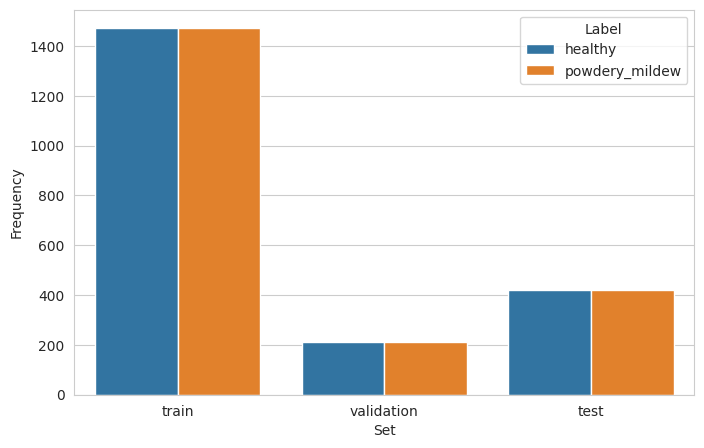

In [9]:
df_freq = pd.DataFrame([])
for folder in ['train', 'validation', 'test']:
    for label in labels:
        df_freq = df_freq.append(
            pd.Series(data={'Set': folder,
                            'Label': label,
                            'Frequency': int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))}
                      ),
            ignore_index=True
        )

        print(
            f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png',
            bbox_inches='tight', dpi=150)
plt.show()

---

## Image data augmentation

### Import ImageDataGenerator

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Initialize ImageDataGenerator

In [11]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

### Augment training image set

In [12]:
batch_size = 64
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Plot augmented training image set

(64, 256, 256, 3)


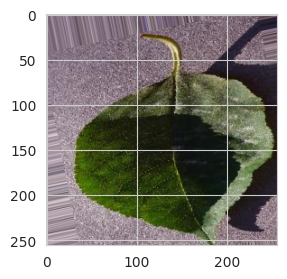

(64, 256, 256, 3)


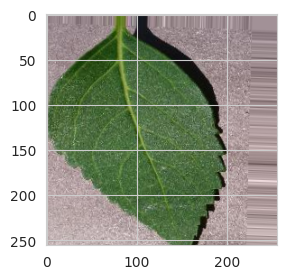

(64, 256, 256, 3)


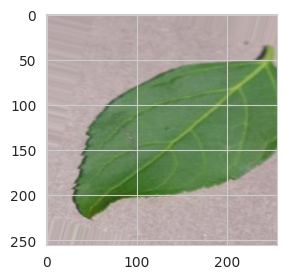

In [13]:
%matplotlib inline
for _ in range(3):
    plt.figure(figsize=(3, 3))
    img, label = train_set.next()
    print(img.shape)  # (20,256,256,3)
    plt.imshow(img[0])
    plt.show()

### Augment validation image set

In [14]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Plot augmented validation image set

In [15]:
for _ in range(3):
    plt.figure(figsize=(3, 3))
    img, label = validation_set.next()
    print(img.shape)  # (20,256,256,3)
    # plt.imshow(img[0])
    # plt.show()

(64, 256, 256, 3)
(64, 256, 256, 3)
(64, 256, 256, 3)


<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

### Augment test image set

In [16]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='binary',
                                                                  shuffle=False
                                                                  )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Plot augmented test image set

In [17]:
for _ in range(3):
    plt.figure(figsize=(3, 3))
    img, label = test_set.next()
    print(img.shape)  # (1,256,256,3)
    # plt.imshow(img[0])
    # plt.show()

(64, 256, 256, 3)
(64, 256, 256, 3)
(64, 256, 256, 3)


<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

### Save class_indices

In [18]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v3/class_indices.pkl']

---

## Model Creation

### Import model packages

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop

### Model

In [24]:
def create_tf_model():
    model = Sequential()
    #Input + Conv 1 + ReLU + Max Pooling
    model.add(layers.Conv2D(32,(5,5),activation='relu',padding='same',input_shape=image_shape))
    model.add(layers.MaxPool2D(strides=4))
    model.add(layers.BatchNormalization())
    # Conv 2 + ReLU + Max Pooling
    model.add(layers.Conv2D(64,(5,5),padding='same',activation='relu'))
    model.add(layers.MaxPool2D(strides=2))
    model.add(layers.BatchNormalization())
    # Conv 3 + ReLU + Max Pooling
    model.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(layers.MaxPool2D(strides=2))
    model.add(layers.BatchNormalization())
    # Conv 4 + ReLU + Max Pooling
    model.add(layers.Conv2D(256,(3,3),dilation_rate=(2,2),padding='same',activation='relu'))
    model.add(layers.Conv2D(256,(3,3),activation='relu'))
    model.add(layers.MaxPool2D(strides=2))
    model.add(layers.BatchNormalization())
    # Fully Connected + ReLU
    model.add(layers.Flatten())
    model.add(layers.Dense(300, activation='relu'))
    model.add(layers.Dense(100, activation='relu'))
    #Output
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', 
                  optimizer=RMSprop(learning_rate=0.001), 
                  metrics=['accuracy'])
    return model


    # model = Sequential()

    # model.add(Conv2D(filters=16, kernel_size=(3, 3),            
    #           input_shape=image_shape, activation=tf.keras.layers.LeakyReLU(alpha=0.01), ))
    # model.add(MaxPooling2D(pool_size=(2, 2)))

    # model.add(Conv2D(filters=32, kernel_size=(3, 3),
    #           input_shape=image_shape, activation=tf.keras.layers.LeakyReLU(alpha=0.01), ))
    # model.add(MaxPooling2D(pool_size=(2, 2)))

    # # model.add(Conv2D(filters=128, kernel_size=(3, 3),
    # #           input_shape=image_shape, activation=tf.keras.layers.LeakyReLU(alpha=0.01), ))
    # # model.add(MaxPooling2D(pool_size=(2, 2)))

    # # model.add(Conv2D(filters=64, kernel_size=(3, 3),
    # #           input_shape=image_shape, activation=tf.keras.layers.LeakyReLU(alpha=0.01), ))
    # # model.add(MaxPooling2D(pool_size=(2, 2)))

    # # model.add(Conv2D(filters=64, kernel_size=(3, 3),
    # #           input_shape=image_shape, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
    # # model.add(MaxPooling2D(pool_size=(2, 2)))

    # model.add(Flatten())
    # model.add(Dense(8, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))

    # model.add(Dropout(0.5))
    # model.add(Dense(1, activation='sigmoid'))

    # model.compile(loss='binary_crossentropy', 
    #               optimizer=RMSprop(learning_rate=0.0001), 
    #               metrics=['accuracy'])

    # return model



### Model Summary

In [25]:
create_tf_model().summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 256, 256, 32)      2432      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 64)        51264     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 128)      

### Early Stopping

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy',mode='max',patience=3,verbose=1)
#early_stop = EarlyStopping(monitor='val_loss', patience=3)

### Fit model for training

In [26]:
model = create_tf_model()
history = model.fit(train_set,
          batch_size=batch_size,
          epochs=25,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )

Epoch 1/25
46/46 [==============================] - 152s 3s/step - loss: 0.4524 - accuracy: 0.9314 - val_loss: 1.0276 - val_accuracy: 0.5190
Epoch 2/25
46/46 [==============================] - 156s 3s/step - loss: 0.1121 - accuracy: 0.9779 - val_loss: 13.9390 - val_accuracy: 0.5000
Epoch 3/25
46/46 [==============================] - 153s 3s/step - loss: 0.0717 - accuracy: 0.9847 - val_loss: 23.2089 - val_accuracy: 0.5000
Epoch 4/25
46/46 [==============================] - 159s 3s/step - loss: 0.0506 - accuracy: 0.9901 - val_loss: 10.7292 - val_accuracy: 0.5000
Epoch 00004: early stopping


### Save model

In [27]:
model.save('outputs/v3/powdery_mildew_model.h5')

---

## Model Performance

### Model learining curve

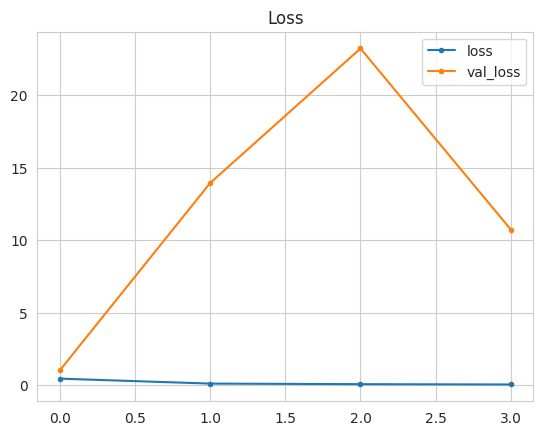

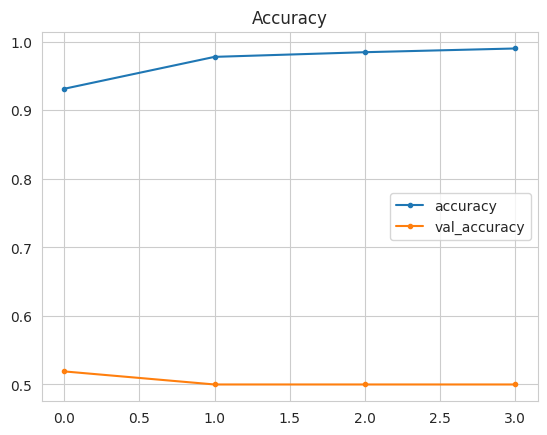

In [28]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png',
            bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png',
            bbox_inches='tight', dpi=150)
plt.show()

---

## Model Evaluation

### Load saved model

In [ ]:
from keras.models import load_model
model = load_model('outputs/v3/powdery_mildew_model.h5')

### Evaluate model on test set

### Accuracy

In [ ]:
evaluation = model.evaluate(test_set, batch_size=batch_size)
print("Model accuracy: {:.2f}%".format(evaluation[1] * 100))
print("Model Loss: ",evaluation[0])

### ROC Curve

In [ ]:
STEP_SIZE_TEST = validation_set.n//validation_set.batch_size
validation_set.reset()
preds = model.predict(validation_set,
verbose=1)

In [ ]:
import sklearn
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
fpr, tpr, _ = roc_curve(validation_set.classes, preds)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Classification Report

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score 

Y_pred = model.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)
print('Classification report')
print(classification_report(test_set.classes, y_pred, target_names=labels))

### Confusion Matrix

In [ ]:
from sklearn import metrics

### Save evaluation pickle

In [ ]:
joblib.dump(value=evaluation,
            filename=f"outputs/v3/evaluation.pkl")

---

## Predict on new data

### Load random image as PIL

In [ ]:
from tensorflow.keras.preprocessing import image

pointer = 66
label = labels[1]  # select healthy or powdery_mildew

pil_image = image.load_img(test_path + '/' + label + '/' + os.listdir(test_path+'/' + label)[pointer],
                           target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image


### Convert image to array and prepare for prediction

In [ ]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

### Predict class probabilities

In [ ]:
pred_proba = model.predict(my_image)[0, 0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_proba > 0.5]

if pred_class == target_map[0]:
    pred_proba = 1 - pred_proba

print(pred_proba)
print(pred_class)